# Part 2: Bootstrapping and Decision Trees (20 points)

### 3. Consider the Hitters dataset provided by the ISLR package. This dataset contains several features related to the hitters of the Major League Baseball from the 1986 and 1987 seasons

In [1]:
install.packages("ISLR")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpkIqTbo/downloaded_packages


In [2]:
library(ISLR)
library(dplyr)
library(tidyr)
data(Hitters)
head(Hitters)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


- Generate the dataset such that the categorical variables are transformed to dummies. Make sure you drop the missing observations if there is any. (2 pts)

In [3]:
Hitters <- na.omit(Hitters)

# Convertir categóricas a dummyes
Hitters <- Hitters %>%
  mutate(across(where(is.factor), ~ as.integer(factor(.)) - 1))

# Ver los primeros registros del nuevo dataset
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,70.0,0


In [4]:
Hitters$log_Salary <- log(Hitters$Salary)
# Eliminar la variable Salary original
Hitters <- Hitters %>% select(-Salary)
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,log_Salary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1,6.163315
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0,6.173786
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1,6.214608
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1,4.516339
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0,6.620073
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0,4.248495


- Divide the sample in two sets: training (90%) and testing (10%) sets. (2 pts)

In [5]:
train_index <- sample(1:nrow(Hitters), size = 0.9 * nrow(Hitters))
train <- Hitters[train_index, ]  # Datos de entrenamiento
test <- Hitters[-train_index, ]
dim(train)
dim(test)

[1] 236  20

[1] 27 20

- Fit an OLS regression to predict the salary of the hitters using all the features of your dataset and provide bootstrap confidence intervals. Follow these steps:

Calculate the OLS point estimate using the training set $\hat{\beta}$. (2 pts)

In [6]:
X <- train %>% select(-log_Salary)  # Todos los regresores (excepto Salary)
Y <- train$log_Salary
model <- lm(Y ~ ., data = X)
beta_hat <- coef(model)
print(beta_hat)

  (Intercept)         AtBat          Hits         HmRun          Runs 
 4.6059622232 -0.0040322013  0.0174354363  0.0089156876 -0.0027188968 
          RBI         Walks         Years        CAtBat         CHits 
-0.0018944568  0.0109713084  0.0482461630  0.0002975748 -0.0006888351 
       CHmRun         CRuns          CRBI        CWalks        League 
 0.0021926502  0.0010721339 -0.0005474106 -0.0013608126  0.3224510323 
     Division       PutOuts       Assists        Errors     NewLeague 
-0.1571631308  0.0003970339  0.0005751489 -0.0066543497 -0.1750754593 


Use a loop to generate 10 000 bootstrap estimates. That is, sample 10 000 times pairs $(y_i, X_i)^{N_{train}}_{i=1}$ with replacement and, for each, estimate the vector of parameters $\hat{\beta}$. You must end up with an array of size (10 000,# features) that contains the sequence $\hat{\beta}_{boots} = (\hat{\beta}^{(1)}, \hat{\beta}^{(2)}, ..., \hat{\beta}^{(10000)})$ so each row is a bootstrapped vector of $\hat{\beta}$. (2 pts)

In [7]:
M <- 100000

# Crear una matriz para almacenar las estimaciones de los coeficientes bootstrap
beta_hat_boost <- matrix(0, nrow = M, ncol = length(beta_hat))

# Realizar el proceso de bootstrap
N <- nrow(X)

for (i in 1:M) {
    Z <- cbind(X, Y)  # Combinar X y Y en una sola matriz
    random_index <- sample(1:N, N, replace = TRUE)  # Muestra aleatoria con reemplazo
    Z_boost <- Z[random_index, ]  # Crear muestra bootstrap
    
    # Separar X e Y en Z_boost
    X_boost <- Z_boost[, -ncol(Z_boost)]  # X sin la última columna (Y)
    Y_boost <- Z_boost[, ncol(Z_boost)]   # La última columna (Y)
    
    X_boost <- as.matrix(X_boost)  # Convertir X_boost a una matriz
    Y_boost <- as.vector(Y_boost) 

    # Ajustar el modelo OLS con los datos bootstrap
    model_boost <- lm(Y_boost ~ X_boost)
    
    # Guardar los coeficientes de la regresión bootstrap
    beta_hat_boost[i, ] <- coef(model_boost)
}

Calculate the 95% confidence intervals $\hat{\beta}^{lower}_{boots}$ and $\hat{\beta}^{upper}_{boots}$ using the empirical approach. These are defined as follows:

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{97.5}_{boots}$

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{2.5}_{boots}$

where $\hat{\beta}^{\alpha}_{boots}$ is the $\alpha$% percentile of the $\hat{\beta}_{boots}$ distribution. (2pts)

In [8]:
beta_hat 
dim(beta_hat_boost)

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.6059622232 -0.0040322013  0.0174354363  0.0089156876 -0.0027188968 
          RBI         Walks         Years        CAtBat         CHits 
-0.0018944568  0.0109713084  0.0482461630  0.0002975748 -0.0006888351 
       CHmRun         CRuns          CRBI        CWalks        League 
 0.0021926502  0.0010721339 -0.0005474106 -0.0013608126  0.3224510323 
     Division       PutOuts       Assists        Errors     NewLeague 
-0.1571631308  0.0003970339  0.0005751489 -0.0066543497 -0.1750754593

[1] 100000     20

In [9]:
delta <- beta_hat - beta_hat_boost 

# Calculate Hall confidence intervals
lower_bound_boost_emp <- beta_hat - quantile(delta, 0.025)
upper_bound_boost_emp <- beta_hat - quantile(delta, 0.975)

results <- data.frame(
  Estimacion = beta_hat,  # Los valores estimados de los coeficientes
  IC_inferior = lower_bound_boost_emp,  # Límite inferior
  IC_superior = upper_bound_boost_emp  # Límite superior
)

# Imprimir los resultados
cat("Intervalos de confianza de Hall:\n")
print(results)

Intervalos de confianza de Hall:
               Estimacion IC_inferior   IC_superior
(Intercept)  4.6059622232    9.178913  0.0004126688
AtBat       -0.0040322013    4.568919 -4.6095817556
Hits         0.0174354363    4.590387 -4.5881141180
HmRun        0.0089156876    4.581867 -4.5966338667
Runs        -0.0027188968    4.570232 -4.6082684512
RBI         -0.0018944568    4.571057 -4.6074440111
Walks        0.0109713084    4.583922 -4.5945782460
Years        0.0482461630    4.621197 -4.5573033914
CAtBat       0.0002975748    4.573249 -4.6052519796
CHits       -0.0006888351    4.572262 -4.6062383894
CHmRun       0.0021926502    4.575144 -4.6033569042
CRuns        0.0010721339    4.574023 -4.6044774204
CRBI        -0.0005474106    4.572404 -4.6060969650
CWalks      -0.0013608126    4.571590 -4.6069103670
League       0.3224510323    4.895402 -4.2830985221
Division    -0.1571631308    4.415788 -4.7627126852
PutOuts      0.0003970339    4.573348 -4.6051525204
Assists      0.0005751489    4.

Calculate the out of sample mean squared error of the model

In [11]:
X_test <- test %>% select(-log_Salary)  # Todos los regresores del conjunto de prueba (excepto Salary)
Y_test <- test$log_Salary  # Valores reales de Salary en el conjunto de prueba
Y_test <- as.matrix(Y_test)

# Realizar predicciones con el modelo ajustado
Y_hat_test <- predict(model, X_test)

# Calcular el OOS MSE
mse <- mean((Y_test - Y_hat_test)^2)

# Imprimir el resultado
cat("Out-of-sample Mean Squared Error (MSE):", mse, "\n")

Out-of-sample Mean Squared Error (MSE): 0.5485562 


- Fit a regression tree to predict the salary using all the features of your dataset. Follow these steps:

Using the training data, fit a tree and prune it. To choose the prunning parameter, cross validate it as we did in class. (4 pts)

In [12]:
library(tree)
library(caret)
library(datasets)
library(ggplot2)

Loading required package: ggplot2

Loading required package: lattice



In [16]:
head(X)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
-Gary Carter,490,125,24,81,105,62,13,6063,1646,271,847,999,680,1,0,869,62,8,1
-Ryne Sandberg,627,178,14,68,76,46,6,3146,902,74,494,345,242,1,0,309,492,5,1
-Danny Tartabull,511,138,25,76,96,61,3,592,164,28,87,110,71,0,1,157,7,8,0
-Gary Ward,380,120,5,54,51,31,8,3118,900,92,444,419,240,0,1,237,8,1,0
-Chris Bando,254,68,2,28,26,22,6,999,236,21,108,117,118,0,0,359,30,4,0
-Juan Beniquez,343,103,6,48,36,40,15,4338,1193,70,581,421,325,0,0,211,56,13,0


In [19]:
tree_model <- tree(Y ~ ., data = X, mincut = 0, minsize = 0, mindev = 0)
cv_tree <- cv.tree(tree_model, K = 3)
optimal_alpha <- cv_tree$k[which(cv_tree$dev == min(cv_tree$dev))]
optimal_size <- cv_tree$size[which(cv_tree$dev == min(cv_tree$dev))]
print(optimal_alpha)
print(optimal_size)

[1] 1.724359
[1] 11


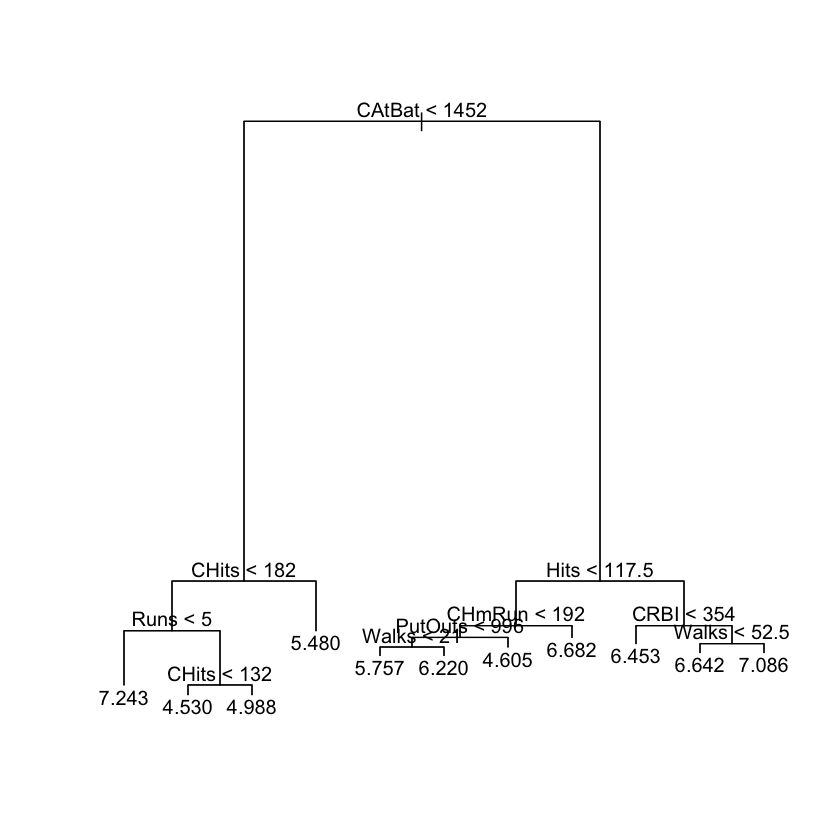

In [20]:
tree_model_prune <- prune.tree(tree_model, best = optimal_size)
plot(tree_model_prune)
text(tree_model_prune, pretty = 0)

Calculate the out of sample mean squared error of the model. (2 pts)

In [128]:
predictions_prune <- predict(tree_model_prune, test)
mse_tree <- mean((Y_test - as.numeric(predictions_prune))^2)

cat("Out-of-sample Mean Squared Error of the Regression Tree:", mse_tree, "\n")

Out-of-sample Mean Squared Error of the Regression Tree: 0.1735817 


- Which model performs better in terms of predictive accuracy? (2 pts) 

##### In terms of power and predictive accuracy, the regression tree that uses cross-validation to find the optimal pruning parameter performs better than using bootsrap regression, which is by observing a lower mean square error . This may be because the sample size used is not small enough to best take advantage of the benefits of bootstrap. As evidenced in Rezazadeh et. al (2019), when the data generation process is unknown and the sample size is larger, regression trees fit better than other predictive methods. Bootstrap is most useful in small samples, where access to more information is limited, which does not seem to be the case with the database used.